# PLAN

- [x] plan
- [x] acquire
- [x] prepare
- [x] explore
- [x] modeling
- [x] deployment
- [ ] maintenance

## Project Description

Customer churn happens when customers stop using a company's services or cancel their subscriptions. This impacts the company's income, growth, and customer loyalty. By understanding why customers leave, businesses can find ways to keep them happy, reduce churn, and improve retention. They can also use tools to predict when customers might leave and take steps to keep them from doing so.

**This project explores the dataset and predictis whether a customer will churn or not churn.**

These datasets contains 12 feature columns. In detail, these are:

**CustomerID:** A unique identifier for each customer  
**Age:** The age of the customer  
**Gender:** Gender of the customer  
**Tenure:** Duration in months for which a customer has been using the company's products or services  
**Usage Frequency:** Number of times that the customer has used the company’s services in the last month  
**Support Calls:** Number of calls that the customer has made to the customer support in the last month  
**Payment Delay:** Number of days that the customer has delayed their payment in the last month  
**Subscription Type:** Type of subscription the customer has choosen  
**Contract Length:** Duration of the contract that the customer has signed with the company  
**Total Spend:** Total amount of money the customer has spent on the company's products or services  
**Last Interaction:** Number of days since the last interaction that the customer had with the company  
**Churn:** Binary label indicating whether a customer has churned (1) or not (0)  

## Environment

In [1]:
# Setting the random seed for reproducibility
import random
random.seed(493)

# For manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# For modeling
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# ACQUIRE

Let's get the data.

In [2]:
# Read a csv file
df_test = pd.read_csv('../data/in/customer_churn_dataset-testing-master.csv')
df_train = pd.read_csv('../data/in/customer_churn_dataset-training-master.csv')

In [3]:
# The two sets were split in an imbalanced way so let's combine the two sets together and split them later
df = pd.concat([df_test, df_train], axis=0) 
df.reset_index(drop=True, inplace=True)

Let's take a peek and get to know our dataframe.

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [5]:
# Summary stats for the numberical columns
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
# Summary stats for the non-numerical columns
df.describe(include=[object]) 

,Gender,Subscription Type,Contract Length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [7]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [8]:
# Sanity check
df.shape

(505207, 12)

# PREPARE

Let's now do a few transformation to prepare our dataframe for analysis.

In [9]:
# Removing the unnecessary column
df.drop(columns='CustomerID', inplace=True)

In [10]:
# Renaming the column names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [11]:
df.head().T

,0,1,2,3,4
age,22.0,41.0,47.0,35.0,53.0
gender,Female,Female,Male,Male,Female
tenure,25.0,28.0,27.0,9.0,58.0
usage_frequency,14.0,28.0,10.0,12.0,24.0
support_calls,4.0,7.0,2.0,5.0,9.0
payment_delay,27.0,13.0,29.0,17.0,2.0
subscription_type,Basic,Standard,Premium,Premium,Standard
contract_length,Monthly,Monthly,Annual,Quarterly,Annual
total_spend,598.0,584.0,757.0,232.0,533.0
last_interaction,9.0,20.0,21.0,18.0,18.0


In [12]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
age,1,0.000198,0,0.0,0,0.0
gender,1,0.000198,0,0.0,0,0.0
tenure,1,0.000198,0,0.0,0,0.0
usage_frequency,1,0.000198,0,0.0,0,0.0
support_calls,1,0.000198,0,0.0,0,0.0
payment_delay,1,0.000198,0,0.0,0,0.0
subscription_type,1,0.000198,0,0.0,0,0.0
contract_length,1,0.000198,0,0.0,0,0.0
total_spend,1,0.000198,0,0.0,0,0.0
last_interaction,1,0.000198,0,0.0,0,0.0


In [13]:
# Let's search for empty rows
df[df.isna().any(axis=1)]

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
263669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Removing the empty row
df.dropna(inplace=True)

In [15]:
# Let's check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                505206 non-null  float64
 1   gender             505206 non-null  object 
 2   tenure             505206 non-null  float64
 3   usage_frequency    505206 non-null  float64
 4   support_calls      505206 non-null  float64
 5   payment_delay      505206 non-null  float64
 6   subscription_type  505206 non-null  object 
 7   contract_length    505206 non-null  object 
 8   total_spend        505206 non-null  float64
 9   last_interaction   505206 non-null  float64
 10  churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


A few of the columns' data types are mismatched. Let's fix that.

In [16]:
# Fix data types
discrete_columns = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction', 'churn']
for col in discrete_columns:
    df[col] = df[col].astype(int)

# Sanity check
df.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,22,Female,25,14,4,27,Basic,Monthly,598.0,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584.0,20,0
2,47,Male,27,10,2,29,Premium,Annual,757.0,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232.0,18,0
4,53,Female,58,24,9,2,Standard,Annual,533.0,18,0


# MODELING

## Train-Test Split

In [17]:
y = df['churn']
X = df.drop(columns='churn')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=493)

# Reset the index of the resulting DataFrames
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [19]:
X_train.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,53,Male,15,7,4,25,Basic,Annual,438.00,1
1,48,Female,44,5,8,6,Basic,Monthly,275.00,2
2,45,Male,30,28,0,10,Basic,Annual,707.30,9
3,34,Female,47,24,6,25,Basic,Annual,510.01,13
4,50,Male,50,26,4,17,Standard,Monthly,843.00,5


In [20]:
X_test.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,55,Female,12,18,10,30,Premium,Annual,904.00,19
1,48,Male,14,19,3,1,Standard,Quarterly,538.49,4
2,24,Male,41,3,7,17,Premium,Monthly,733.34,26
3,39,Male,14,2,0,4,Standard,Monthly,170.73,25
4,60,Male,44,28,10,18,Standard,Quarterly,676.00,25


## Validating Categorical Columns in Test Data

In [21]:
def validate_test_data_categorical_columns(train_df, test_df):
    # Get the list of categorical columns for both train and test DataFrames
    train_df_categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
    test_df_categorical_columns = test_df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Check if the number of categorical columns is the same in both DataFrames
    if len(set(train_df_categorical_columns).intersection(set(test_df_categorical_columns))) == 0:
        print('Train and test dataframes have different categorical columns')
        return
    else:
        for cat_col in test_df_categorical_columns:
            # Create sets of unique values for the current categorical column in both DataFrames
            train_col = set(x for x in train_df[cat_col].unique().tolist() if not pd.isna(x))
            test_col = set(x for x in test_df[cat_col].unique().tolist() if not pd.isna(x))
            
            # Check if the sets are not equal, indicating different unique values
            if train_col != test_col:
                print(f'{cat_col} column has different unique values in train and test data:')
                print(f'Unique values in train data: {train_col}')
                print(f'Unique values in test data: {test_col}')
                return
        
        print('All categorical columns have consistent unique values in train and test data.')
        return

In [22]:
validate_test_data_categorical_columns(X_train, X_test)

All categorical columns have consistent unique values in train and test data.


## Scaling and Encoding

In [23]:
# Get a list of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.pop()    # drops the targert variable

'churn'

In [24]:
# Get a list of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [25]:
# Separate numerical and categorical features
X_train_numerical = X_train[numerical_columns].astype(float)
X_train_categorical = X_train[categorical_columns].values.reshape(-1, 1)
X_test_numerical = X_test[numerical_columns].astype(float)
X_test_categorical = X_test[categorical_columns].values.reshape(-1, 1)

In [26]:
# Separate numerical and categorical features
X_train_numerical = X_train[numerical_columns]
X_train_categorical = X_train[categorical_columns]
X_test_numerical = X_test[numerical_columns]
X_test_categorical = X_test[categorical_columns]

In [27]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

In [28]:
# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train_categorical)
X_test_encoded = encoder.transform(X_test_categorical)

In [29]:
feature_names = encoder.get_feature_names_out(['gender', 'subscription_type', 'contract_length'])
feature_names

array(['gender_Female', 'gender_Male', 'subscription_type_Basic',
       'subscription_type_Premium', 'subscription_type_Standard',
       'contract_length_Annual', 'contract_length_Monthly',
       'contract_length_Quarterly'], dtype=object)

In [30]:
train_categorical_one_encoded_data = encoder.transform(X_train[['gender', 'subscription_type', 'contract_length']])
train_OHE_df = pd.DataFrame(train_categorical_one_encoded_data, columns=feature_names)

test_categorical_one_encoded_data = encoder.transform(X_test[['gender', 'subscription_type', 'contract_length']])
test_OHE_df = pd.DataFrame(test_categorical_one_encoded_data, columns=feature_names)

In [31]:
train_OHE_df.head()
test_OHE_df.head()

,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
# Remove the original categorical features because we don't need them anymore
X_train = X_train.drop(columns=['gender', 'subscription_type', 'contract_length'])
X_test = X_test.drop(columns=['gender', 'subscription_type', 'contract_length'])

In [33]:
# Combine the numerical plus the encoded features
X_train = pd.concat([X_train, train_OHE_df], axis=1)
X_test = pd.concat([X_test, test_OHE_df], axis=1)

In [34]:
X_train.head()
X_test.head()

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,53,15,7,4,25,438.00,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,48,44,5,8,6,275.00,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,45,30,28,0,10,707.30,9,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,34,47,24,6,25,510.01,13,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,50,50,26,4,17,843.00,5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,55,12,18,10,30,904.00,19,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,48,14,19,3,1,538.49,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,24,41,3,7,17,733.34,26,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,39,14,2,0,4,170.73,25,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,60,44,28,10,18,676.00,25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
X_train.shape
X_test.shape

(404164, 15)

(101042, 15)

In [36]:
# Save the encoder to a file
with open('../data/out/encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

## Modeling

In [37]:
# DataFrame to keep track of results
metrics_tally = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall"])

def k_fold_cross_validation_with_metrics(classifier, X, y, model_name=None, k_folds=5):
    global metrics_tally  # Use the global DataFrame to store results

    # Initialize stratified k-fold cross-validation
    stratified_kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=493)

    # Lists to store the evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Perform cross-validation
    for train_index, test_index in stratified_kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the classifier on the training data
        classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics for this fold
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)

        # Append the metrics to their respective lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)

    # Calculate the mean of each metric across all folds
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)

    # Print the results for this call
    print("Mean Metrics Across Folds:")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Mean Precision: {mean_precision:.2f}")
    print(f"Mean Recall: {mean_recall:.2f}")

    # Add results to the tally table
    model_name = model_name or classifier.__class__.__name__
    metrics_tally = pd.concat(
        [
            metrics_tally,
            pd.DataFrame(
                {
                    "Model": [model_name],
                    "Accuracy": [mean_accuracy],
                    "Precision": [mean_precision],
                    "Recall": [mean_recall],
                }
            ),
        ],
        ignore_index=True,
    )

    # Display the updated tally
    print("\nMetrics Tally:")
    print(metrics_tally)

In [38]:
def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print()
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

    class_report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(class_report)

In [39]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = MultinomialNB()
model4 = RandomForestClassifier()
model5 = XGBClassifier()

k_fold_cross_validation_with_metrics(model1, X_train, y_train, model_name="Logistic Regression")
k_fold_cross_validation_with_metrics(model2, X_train, y_train, model_name="Naive Bayes")
k_fold_cross_validation_with_metrics(model1, X_train, y_train, model_name="Multinomial Naive Bayes")
k_fold_cross_validation_with_metrics(model2, X_train, y_train, model_name="Random Forest")
k_fold_cross_validation_with_metrics(model2, X_train, y_train, model_name="XGBoost")

C:\Users\Dd\OneDrive\Documents\_github\customer-churn\v312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dd\OneDrive\Documents\_github\customer-churn\v312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Mean Metrics Across Folds:
Mean Accuracy: 0.84
Mean Precision: 0.86
Mean Recall: 0.85

Metrics Tally:
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.841542   0.862842  0.849724
Mean Metrics Across Folds:
Mean Accuracy: 0.86
Mean Precision: 0.90
Mean Recall: 0.83

Metrics Tally:
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.841542   0.862842  0.849724
1          Naive Bayes  0.855635   0.904994  0.826827


C:\Users\Dd\OneDrive\Documents\_github\customer-churn\v312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dd\OneDrive\Documents\_github\customer-churn\v312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Mean Metrics Across Folds:
Mean Accuracy: 0.84
Mean Precision: 0.86
Mean Recall: 0.85

Metrics Tally:
                     Model  Accuracy  Precision    Recall
0      Logistic Regression  0.841542   0.862842  0.849724
1              Naive Bayes  0.855635   0.904994  0.826827
2  Multinomial Naive Bayes  0.841542   0.862842  0.849724
Mean Metrics Across Folds:
Mean Accuracy: 0.86
Mean Precision: 0.90
Mean Recall: 0.83

Metrics Tally:
                     Model  Accuracy  Precision    Recall
0      Logistic Regression  0.841542   0.862842  0.849724
1              Naive Bayes  0.855635   0.904994  0.826827
2  Multinomial Naive Bayes  0.841542   0.862842  0.849724
3            Random Forest  0.855635   0.904994  0.826827
Mean Metrics Across Folds:
Mean Accuracy: 0.86
Mean Precision: 0.90
Mean Recall: 0.83

Metrics Tally:
                     Model  Accuracy  Precision    Recall
0      Logistic Regression  0.841542   0.862842  0.849724
1              Naive Bayes  0.855635   0.904994  0.82682

## Model Validation

### Train

MultinomialNB()

<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

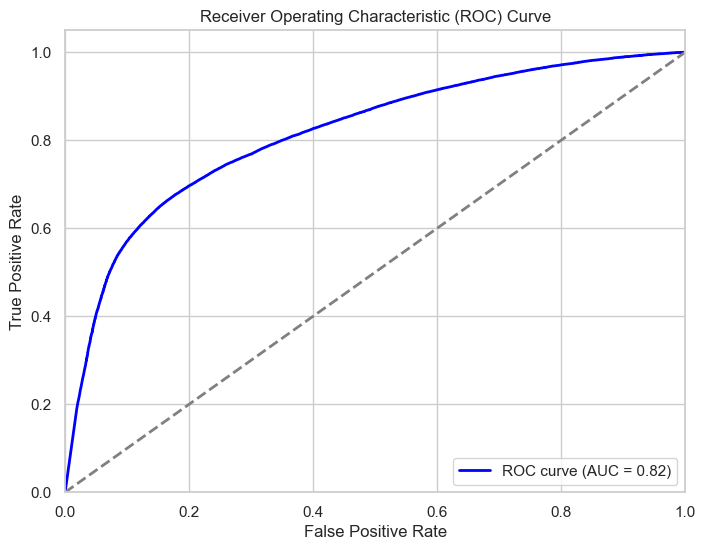

AUC-ROC: 0.82


In [40]:
# Multinomial Naive Bayes model

# Train a Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (no discrimination)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUC score
print(f"AUC-ROC: {roc_auc:.2f}")

### Test

In [41]:
# Testing MultinomialNB

y_pred = model.predict(X_test)
print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.74
Precision: 0.81
Recall: 0.70

Confusion Matrix:
[[35989  8995]
 [17026 39032]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.73     44984
           1       0.81      0.70      0.75     56058

    accuracy                           0.74    101042
   macro avg       0.75      0.75      0.74    101042
weighted avg       0.75      0.74      0.74    101042



In [42]:
with open("../data/out/customer_churn_multinomialnb_model.pkl", 'wb') as model_file:
    pickle.dump(model, model_file)

Predicted class labels: [1 0 0 ... 1 1 1]
Predicted probabilities: [[2.18688348e-02 9.78131165e-01]
 [9.99349515e-01 6.50485312e-04]
 [5.02007093e-01 4.97992907e-01]
 [1.93635877e-09 9.99999998e-01]
 [1.47904346e-10 1.00000000e+00]]


<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

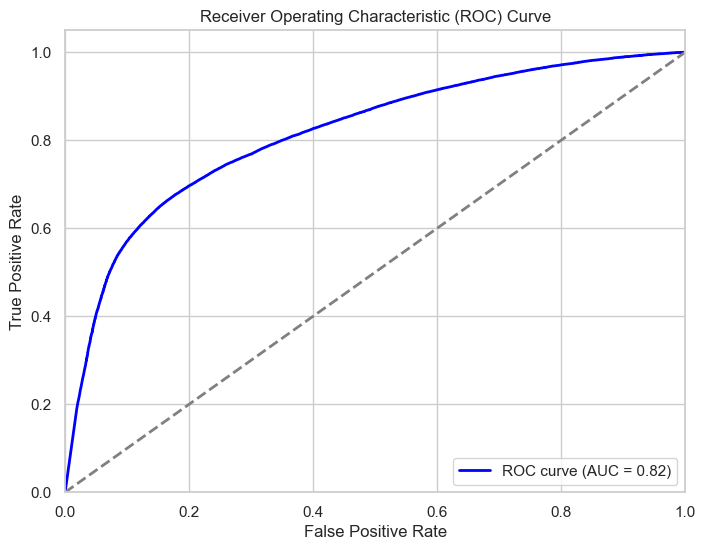

AUC-ROC: 0.82

Accuracy: 0.7424734268917875
Precision: 0.8127095175630374
Recall: 0.6962788540440258


In [43]:
y_pred = model.predict(X_test)
print("Predicted class labels:", y_pred)

y_prob = model.predict_proba(X_test)
print("Predicted probabilities:", y_prob[:5])  # Show probabilities for first 5 samples

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (no discrimination)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUC score
print(f"AUC-ROC: {roc_auc:.2f}")

# Calculate evaluation metrics for this fold
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

## Deployment

In [44]:
class CustomerChurnClassifier:
    
    def __init__(self, model_path, encoder_path):
        
        with open(model_path, 'rb') as file:
            self.model = pickle.load(file)
            
        with open(encoder_path, 'rb') as file:
            self.encoder = pickle.load(file)
    
    def predict(self, age: int, tenure: int, usage_frequency: int, support_calls: int, payment_delay: int, total_spend: float, last_interaction: int, gender: str, subscription_type: str, contract_length: str):
        
        # Checking input datatypes
        expected_data_types = [int, int, int, int, int, float, int, str, str, str]
        input_arguments = [age, tenure, usage_frequency, support_calls, payment_delay, total_spend, last_interaction, gender, subscription_type, contract_length]
        input_arguments_names = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'total_spend', 'last_interaction', 'gender', 'subscription_type', 'contract_length']

        for i in range(len(input_arguments)):
            current_arg_type = type(input_arguments[i])

            if current_arg_type != expected_data_types[i]:
                raise TypeError(f"Error: Given {input_arguments_names[i]} ({current_arg_type.__name__}) is not of the expected type ({expected_data_types[i].__name__}).")
                
                
        # Checking gender, subscription_type, and contract_length values
        valid_genders = ['Female', 'Male']
        valid_subscription_types = ['Standard', 'Basic', 'Premium']
        valid_contract_lengths = ['Annual', 'Monthly', 'Quarterly']

        if gender not in valid_genders:
            raise ValueError(f"Error: Invalid gender value '{gender}'. Expected one of {valid_genders}.")

        if subscription_type not in valid_subscription_types:
            raise ValueError(f"Error: Invalid subscription_type value '{subscription_type}'. Expected one of {valid_subscription_types}.")

        if contract_length not in valid_contract_lengths:
            raise ValueError(f"Error: Invalid contract_length value '{contract_length}'. Expected one of {valid_contract_lengths}.")
            
            
        
        # One Hot Encoding
        ohe_data = list(self.encoder.transform([[gender, subscription_type, contract_length]])[0])
        
        to_predict_array = [age, tenure, usage_frequency, support_calls, payment_delay, total_spend, last_interaction] + ohe_data
        to_predict_array = np.array(to_predict_array).reshape((1, -1))
                
        prediction = self.model.predict(to_predict_array)[0]
        
        if prediction > 0.5:
            return 'Will Churn'
        else:
            return "Won't Churn"

In [45]:
customer_churn = CustomerChurnClassifier(
    model_path = '../data/out/customer_churn_multinomialnb_model.pkl', 
    encoder_path = '../data/out/encoder.pkl'
)

In [46]:
customer_churn.predict(
    age = 19, 
    tenure = 48, 
    usage_frequency = 7, 
    support_calls = 3, 
    payment_delay = 30, 
    total_spend = 787.0, 
    last_interaction = 29, 
    gender = 'Female', 
    subscription_type = 'Premium', 
    contract_length = 'Annual'
)

C:\Users\Dd\OneDrive\Documents\_github\customer-churn\v312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Dd\OneDrive\Documents\_github\customer-churn\v312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


"Won't Churn"